# **Chateau Winery (A): Unsupervised Learning**

This case follows Bill Booth, the marketing manager for Chateau winery, as he attempts to construct targeted deals for specific groups of customers using historical online sales data.

In [43]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.em import EMClusterer
from nltk.cluster.util import cosine_distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/wine-data/wine_data (1).csv')

In [6]:
df.head()

,name,Pinot Noir,Champagne
0,Aerts,24,24
1,Alldredge,21,14
2,Alt,20,12
3,Amsden,24,13
4,Baglivo,23,11


In [7]:
df.shape

(63, 3)

Text(0, 0.5, 'Champagne')

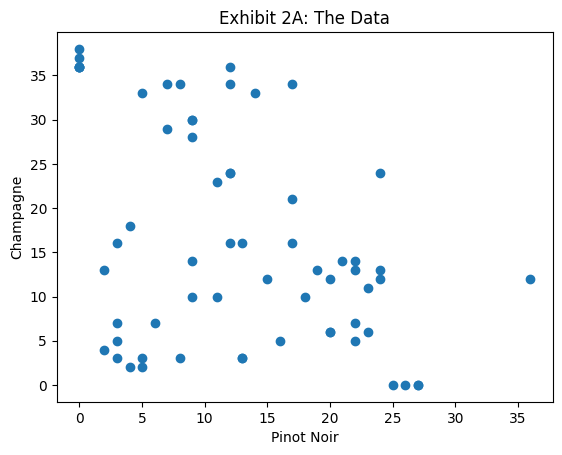

In [9]:
# Create scatter plot with Pinot Noir on the x-axis and Champage on the y-axis
plt.scatter(df['Pinot Noir'], df['Champagne'])

# Add a title to the plot
plt.title("Exhibit 2A: The Data")

# Add labels for the x and y axes
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Step 2: Apply k-means clustering with  k = 2
Next we can easily apply the k-means algorithm in Python using tools from the sklearn.cluster
 module we imported at the beginning of the notebook.

Step 2a: Initialize clustering
First we need to create a KMeans
 object (which we'll call kmeans2
) and specify our desired value for the number of clusters (k
). We do this using KMeans
(), which takes the following arguments:

n
_clusters
, our desired value for k
.
init
, an optional parameter with the starting points for the cluster centroids. If this parameter is left out, the initial centroids will be chosen automatically. See the documentation here for more details.
n
_init
, an optional parameter that specifies the number of times the algorithm is run with different starting points. Because we are only running with the initial cluster centroids specified on page 3 of the case, we set this parameter to one.

In [11]:
kmeans2 = KMeans(n_clusters=2, init=np.array([[8, 17],[27, 1]]), n_init=1)

# Prepare input data

In this step, we convert our data to a numpy array with the to
numpy()
 method. Again, we are not altering the contents of the data in any way, just storing it in a different format. In the code cell below we create the array, store it in X
wine
, and output the first five elements; note that these correspond to the first five rows of the data from the Read in Data section above.

In [12]:
X_wine = df[['Pinot Noir', 'Champagne']].to_numpy()
X_wine[:5]

array([[24, 24],
       [21, 14],
       [20, 12],
       [24, 13],
       [23, 11]])

# Perform k-means clustering
Now we apply the k-means clustering algorithm to our data by calling the fit
() method on the kmeans2
 object we created in Step 2a. We pass the numpy array with our data (X
_wine
) into fit
().

In [13]:
kmeans2.fit(X_wine)

KMeans(init=array([[ 8, 17],
       [27,  1]]), n_clusters=2, n_init=1)

# View output
We can output the coordinates of the final cluster centroids with kmeans2.cluster
_centers
_:

In [14]:
kmeans2.cluster_centers_

array([[ 7.81818182, 31.22727273],
       [15.36585366,  8.41463415]])

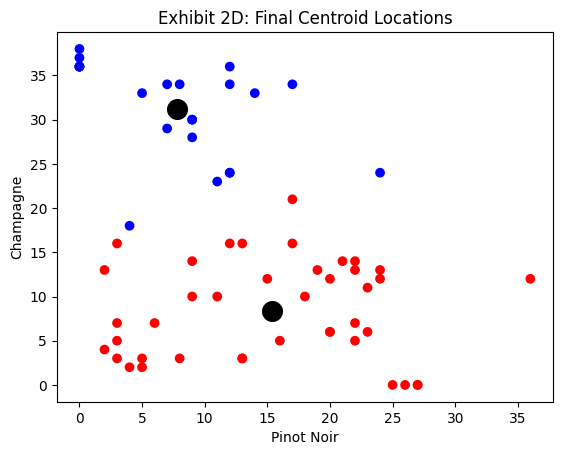

In [22]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 2D: Final Centroid Locations")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(df['Pinot Noir'], df['Champagne'], c=kmeans2.labels_, cmap='bwr')

# Plot the final cluster centroids in black
plt.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], marker="o", 
            color='black', s=200)

# Step 3: Apply k-means clustering with  k = 3
Following the same steps as above, we can run the k-means clustering algorithm with  k
 =3.

Step 3a: Initialize clustering
Now we create a  KMeans
  object called  kmeans3
  where we set  n
 _ clusters
  equal to three. This time we will leave out the optional  init
  and  n
 _ init
  parameters. By leaving these parameters out the function will try several different random starting points for the cluster centroids and choose the points with the best performance.

Note that we include the optional  random
 _ state
  parameter, which sets the seed of the random number generator (RNG). By seeding the RNG we ensure that the same random starting points are chosen each time we perform the clustering, which ensures that our results do not change every time we re-run the code cell. The value of the seed (162012) was itself chosen randomly

In [23]:
kmeans3 = KMeans(n_clusters=3, random_state=42)

In [24]:
kmeans3.fit(X_wine)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

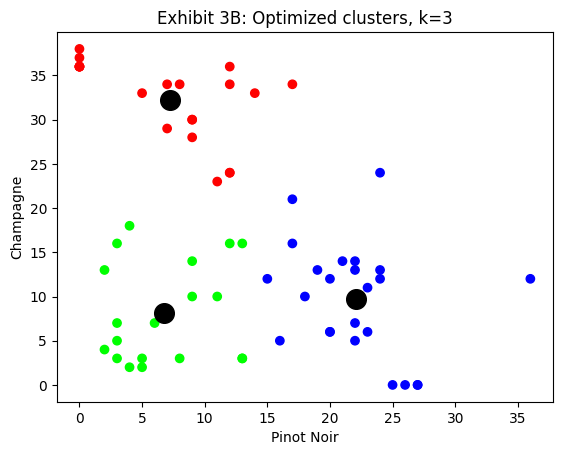

In [27]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 3B: Optimized clusters, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(df['Pinot Noir'], df['Champagne'], c=kmeans3.labels_, cmap='brg')

# Plot the final cluster centroids in black
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], marker="o", 
            color='black', s=200)

# Silhouette Values
As a reminder, the silhouette value is an indication of how well a data point fits in its cluster (see case Exhibit 4a). A silhouette value close to zero indicates that the data point could reasonably belong to its assigned cluster or the next closest cluster. A silhouette value close to 1 indicates that the data point clearly belongs to its assigned cluster.

Step 1: Calculate silhouette score for k
=2
First we will calculate the average silhouette values for all of the observations when k
=2. We can do this using the silhouette
_score
() function that we imported from sklearn.metrics
. This function takes two arguments:

X
_wine
, the numpy array we created with each observation in our data set.
labels
, an array containing the cluster assignments for each of the observations in X
_wine
. We can create this array with fit
_predict
().

In [28]:
labels2 = kmeans2.fit_predict(X_wine)
silhouette_score(X_wine, labels2)

0.5136858188733632

In [29]:
labels2

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int32)

# Calculate silhouette score for  k = 3

In [31]:
labels3 = kmeans3.fit_predict(X_wine)
silhouette_score(X_wine, labels3)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.49912810859273954

In [33]:
df["Cluster (k=3)"] = labels3 + 1
df.head()

,name,Pinot Noir,Champagne,Cluster (k=3)
0,Aerts,24,24,1
1,Alldredge,21,14,1
2,Alt,20,12,1
3,Amsden,24,13,1
4,Baglivo,23,11,1


In [34]:
df["Silhouette Value (k=2)"] = silhouette_samples(X_wine, labels2)
df.head()

,name,Pinot Noir,Champagne,Cluster (k=3),Silhouette Value (k=2)
0,Aerts,24,24,1,0.013995
1,Alldredge,21,14,1,0.485142
2,Alt,20,12,1,0.553245
3,Amsden,24,13,1,0.494271
4,Baglivo,23,11,1,0.555221


In [35]:
df["Silhouette Value (k=2)"].mean()

0.5136858188733632

In [36]:
df["Silhouette Value (k=3)"] = silhouette_samples(X_wine, labels3)
df.head()

,name,Pinot Noir,Champagne,Cluster (k=3),Silhouette Value (k=2),Silhouette Value (k=3)
0,Aerts,24,24,1,0.013995,0.168164
1,Alldredge,21,14,1,0.485142,0.528097
2,Alt,20,12,1,0.553245,0.519968
3,Amsden,24,13,1,0.494271,0.585695
4,Baglivo,23,11,1,0.555221,0.598592


In [39]:
df["Cluster (k=2)"] = labels2 + 1
df.head()

,name,Pinot Noir,Champagne,Cluster (k=3),Silhouette Value (k=2),Silhouette Value (k=3),Cluster (k=2)
0,Aerts,24,24,1,0.013995,0.168164,1
1,Alldredge,21,14,1,0.485142,0.528097,2
2,Alt,20,12,1,0.553245,0.519968,2
3,Amsden,24,13,1,0.494271,0.585695,2
4,Baglivo,23,11,1,0.555221,0.598592,2


In [41]:
df.sort_values(by=["Cluster (k=2)", "Cluster (k=3)", "Silhouette Value (k=2)"],
                         ascending=[True, True, False])

,name,Pinot Noir,Champagne,Cluster (k=3),Silhouette Value (k=2),Silhouette Value (k=3),Cluster (k=2)
0,Aerts,24,24,1,0.013995,0.168164,1
13,Ebeling,7,34,2,0.719956,0.738870,1
14,England,8,34,2,0.717058,0.737650,1
12,Dernburg,5,33,2,0.711505,0.722207,1
15,Eyberg,9,30,2,0.681170,0.689690,1
...,...,...,...,...,...,...,...
36,Onley,9,14,3,0.327565,0.402231,2
43,Rantoul,13,16,3,0.297344,0.053057,2
47,Soule,12,16,3,0.273749,0.148846,2
49,Still,2,13,3,0.200438,0.547475,2


**Plotting Silhoutette Score different K's**

Text(0, 0.5, 'Average Silhouette Score')

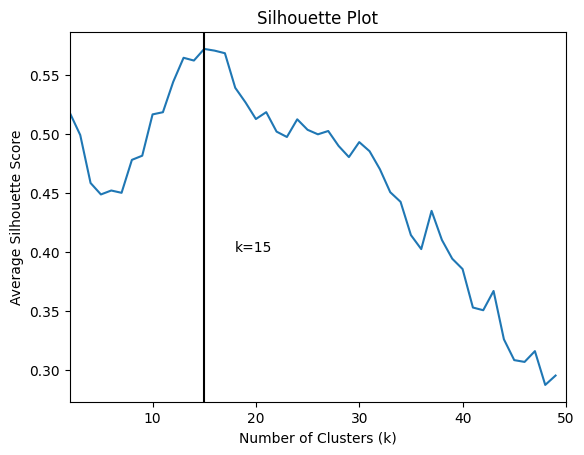

In [45]:
silhouette_scores = [] # Initialize empty list to store silhouette scores

# Loop over different values of k and calculate the average silhouette score
for i in range(2, 50):
    
    # Initialize clustering with k = i
    kmeansI = KMeans(n_clusters=i, random_state=42)
    
    # Apply clustering
    kmeansI.fit(X_wine)
    
    # Calculate the silhouette score when k = i
    labelsI = kmeansI.fit_predict(X_wine)
    scoreI = silhouette_score(X_wine, labelsI)
    
    # Add silhouette score at k = i to silhouette_scores
    silhouette_scores.append((i, scoreI))
    
# Plot the average silhouette score for each value of k
x,y = zip(*silhouette_scores)
plt.plot(x, y)

# Plot a vertical line at whichever k maximizes the silhouette score
maxK = x[y.index(max(y))]
plt.axvline(x=maxK, color="black")
plt.text(18, 0.4, 'k='+str(maxK), color='black')

# Label the chart and the x and y axes
plt.title("Silhouette Plot")
plt.xlabel("Number of Clusters (k)")
plt.xlim([2,50])
plt.ylabel("Average Silhouette Score")

# Gaussian Mixture Models

Gaussian Mixture Models (GMM) assume that clusters are distributed as a normal distribution with different means and some variance-covariance structure. The GMM estimates the parameters of these distributions to maximize the probability that the data were drawn from these distributions.

**Step 1: Apply GMM with k = 2**
Now that we've seen how to apply the k-means algorithm to our data, let's apply GMM.

Step 1a: Initialize clustering
Similar to the k-means algorithm, we start by creating a GaussianMixture
 object where we specify our desired value for k
. This time we specify the number of clusters with the n
_components
 parameter.

In [47]:
gmm2 = GaussianMixture(n_components=2, n_init=1, random_state=42)

In [48]:
gmm2.fit(X_wine)

GaussianMixture(n_components=2, random_state=42)

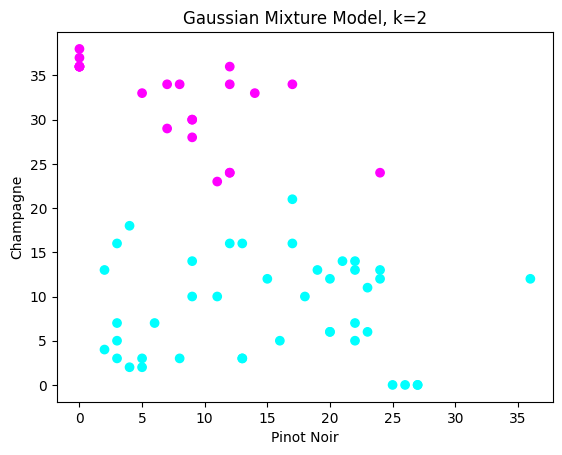

In [50]:
# Plot chart title and label the x and y axes
plt.title("Gaussian Mixture Model, k=2")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm2.predict(X_wine)
plt.scatter(df['Pinot Noir'], df['Champagne'], c=labels, cmap='cool')

We can also output the probability that a given observation belongs to each cluster. In the code chunk below, we output this information for the first five observations. The first column represents the probability that each observation belongs to cluster 1, and the second column represents the probability that each observation belongs to cluster 2. For example, according to the model the probability that the first observation belongs to the first cluster is 0.317, and the probability that it belongs to the second cluster is 0.683.m

In [52]:
probAssignments = gmm2.predict_proba(X_wine)
probAssignments[:5].round(3)

array([[0.317, 0.683],
       [0.998, 0.002],
       [1.   , 0.   ],
       [0.999, 0.001],
       [1.   , 0.   ]])

Using these probabilities, we can scale the color of each point in our plot based on the confidence of the assignment. In the plot below, observations that have a high probability of belonging to one cluster are either bright blue or bright pink. The points in between these two color extremes are observations whose probability assignments are more evenly distributed over the two clusters.

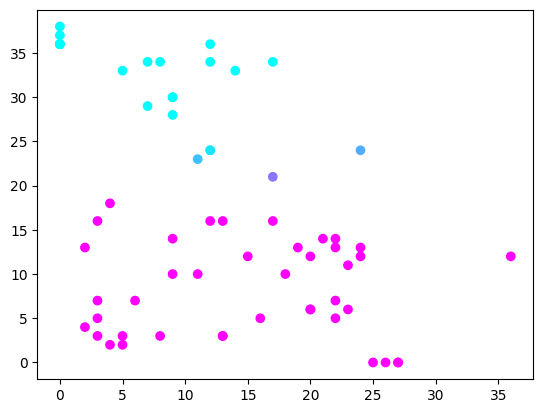

In [53]:
labelsProb = [i[0] for i in probAssignments]
plt.scatter(df['Pinot Noir'], df['Champagne'], c=labelsProb, cmap='cool')

# Step 2: Apply GMM with  k = 3
Using the same code as Step 1, below we apply GMM with three clusters.

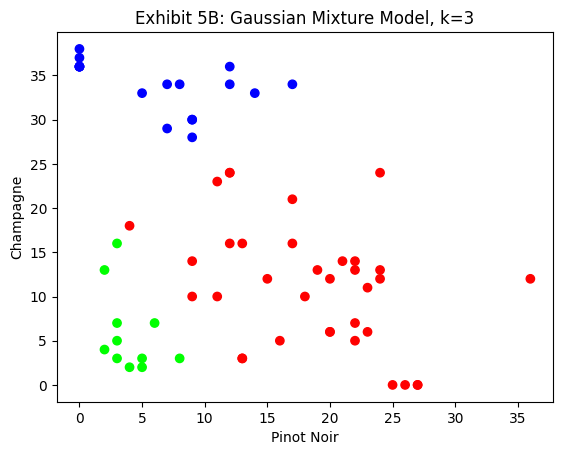

In [55]:
# Perform clustering
gmm3 = GaussianMixture(n_components=3, n_init=1, random_state=605973)
gmm3.fit(X_wine)

# Plot chart title and label the x and y axes
plt.title("Exhibit 5B: Gaussian Mixture Model, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm3.predict(X_wine)
plt.scatter(df['Pinot Noir'], df['Champagne'], c=labels, cmap='brg')

# Clustering with Cosine Similarity
Instead of applying the k-means clustering algorithm with Euclidean distance, we can also apply it in Python with cosine similarity.

Step 1: Apply k-means clustering with k
=2 using cosine similarity
Step 1a: Initialize clustering
Because KMeans
 from sklearn.cluster
 does not support cosine similarity, we will now use an alternate implementation of the algorithm from nltk.cluster.kmeans
. We start by initializing a KMeansClusterer
 object where k
=2. We also set the distance
 parameter equal to cosine
_distance
 to indicate we would like to use cosine similarity as our distance measure.

In [56]:
kmeans2Cos = KMeansClusterer(2, distance=cosine_distance, avoid_empty_clusters=True, repeats=500)    

In [57]:
kmeans2CosClusters = kmeans2Cos.cluster(X_wine, assign_clusters=True)

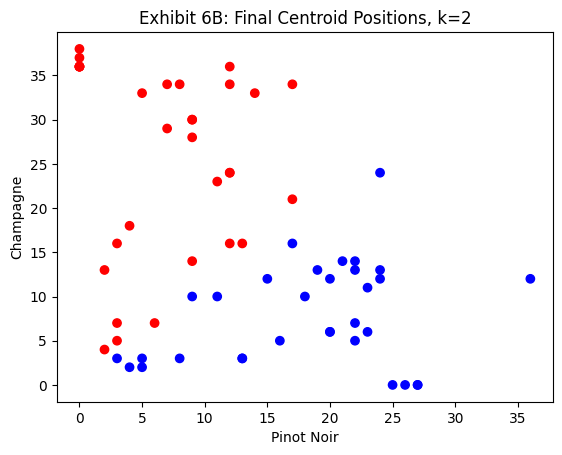

In [58]:
# Plot chart title and label the x and y axes
plt.title("Exhibit 6B: Final Centroid Positions, k=2")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(df['Pinot Noir'], df['Champagne'], c=kmeans2CosClusters, cmap='bwr')

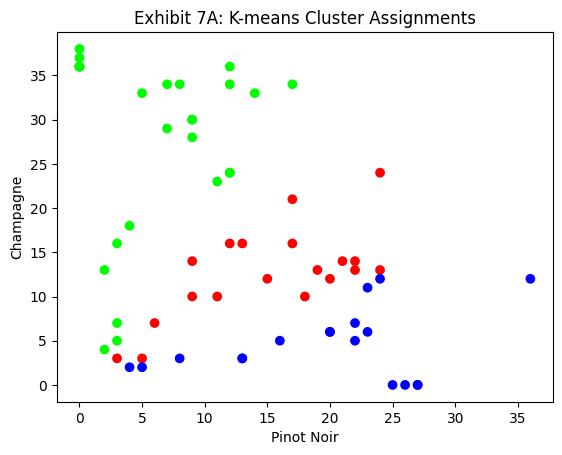

In [59]:
# Perform clustering
kmeans3Cos = KMeansClusterer(3, distance=cosine_distance, avoid_empty_clusters=True, repeats=500)
kmeans3CosClusters = kmeans3Cos.cluster(X_wine, assign_clusters=True)

# Plot chart title and label the x and y axes
plt.title("Exhibit 7A: K-means Cluster Assignments")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
plt.scatter(df['Pinot Noir'], df['Champagne'], c=kmeans3CosClusters, cmap='brg')

# Apply GMM clustering with  k =3 using cosine similarity
Because the GaussianMixture
() function does not support cosine similarity, we need to use a workaround. Minimizing the Euclidean distance between x
 and y
 is equivalent to maximizing their cosine similarity if the data are normalized. Therefore, if we normalize our data first, clustering with Euclidean distance is equivalent to clustering with cosine similarity.

Step 3a: Normalize vectors
First we use the normalize
() function from sklearn
 to normalize our data.

In [61]:
df_norm = preprocessing.normalize(df[['Pinot Noir', 'Champagne']])
df_norm[:5]

array([[0.70710678, 0.70710678],
       [0.83205029, 0.5547002 ],
       [0.85749293, 0.51449576],
       [0.87929197, 0.47628315],
       [0.90213422, 0.4314555 ]])

# Perform GMM clustering
Now we apply the GaussianMixture
() function to our normalized data.

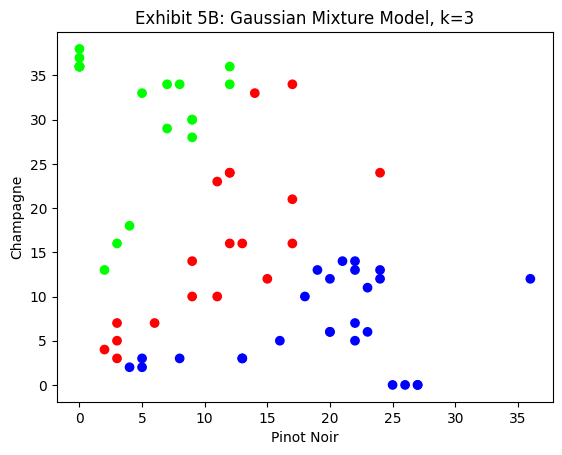

In [66]:
gmm3cos = GaussianMixture(n_components=3, random_state=144038)
gmm3cos.fit(df_norm)

# Plot chart title and label the x and y axes
plt.title("Exhibit 5B: Gaussian Mixture Model, k=3")
plt.xlabel("Pinot Noir")
plt.ylabel("Champagne")

# Plot the observations color-coded by cluster
labels = gmm3cos.predict(df_norm)
plt.scatter(df['Pinot Noir'], df['Champagne'], c=labels, cmap='brg')